In [104]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [105]:
dengue = pd.read_csv('dengue.csv')

In [106]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [107]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

<h2>Insight 1:<h2>
<h2>The year 2019 recorded the highest number of dengue cases, with a total of 441,902 cases out of the cumulative 1,147,425 cases reported over the observed period. This accounts for approximately 38.5% of all dengue cases<h2>

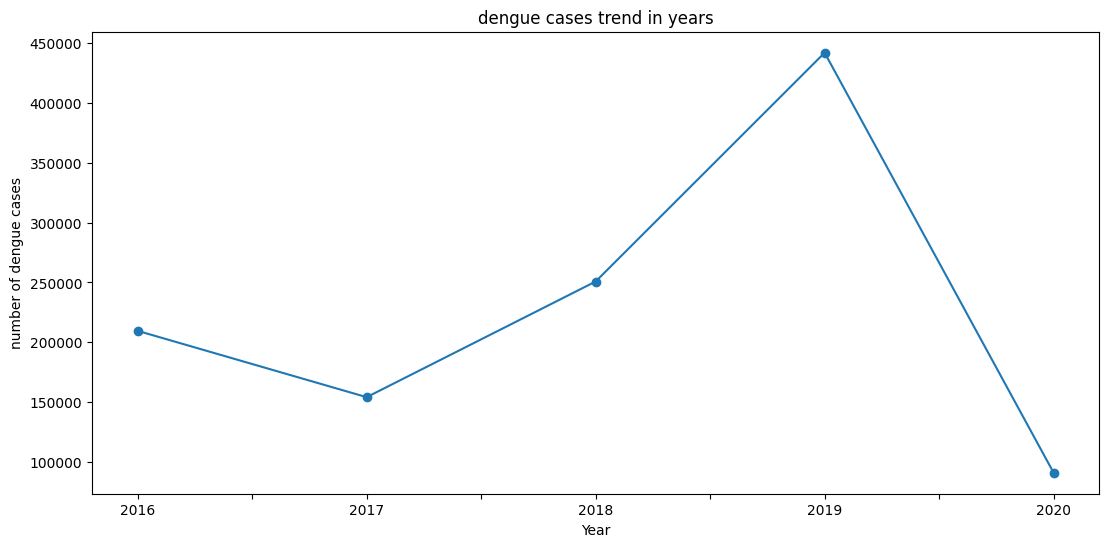

In [108]:
#year 
year = dengue.groupby(['Year'])['Dengue_Cases'].sum()
plt.figure(figsize=(13,6))
plt.title('dengue cases trend in years')
year.plot(kind='line', marker ='o')
plt.ylabel('number of dengue cases')
plt.show()


<h1>Insight 2<h1>
<h2>The majority of dengue cases occur during the rainy season, from June to November, accounting for approximately 78.3% of all annual cases. The highest number of dengue cases is observed in August, with 187,554 cases, representing 16.3% of the total annual cases. <h2>

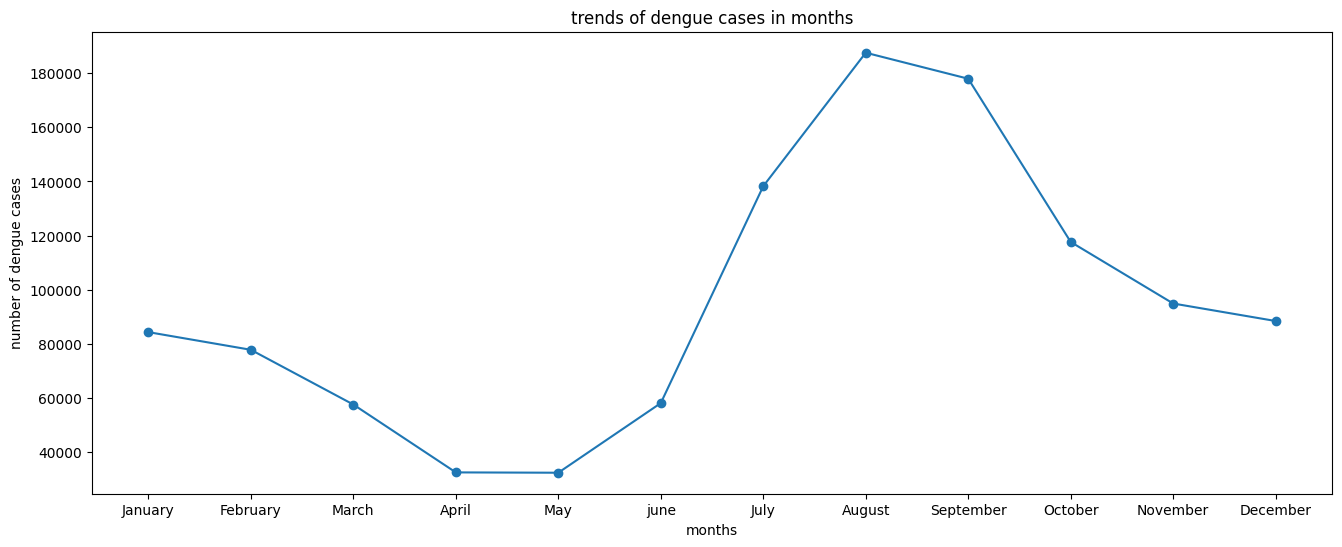

In [109]:
#Average Monthly Dengue Cases Trend
month_names = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12,
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12,
}

month = dengue['Month']

dengue['number_months'] = month.str.lower().map(month_names) 
month_names_reversed = {
    1: 'January', 2:'February', 3:'March', 4: 'April', 5:'May',6:'june',7:'July',8:'August',9:'September', 10: 'October', 11:'November', 12:'December'
}

month_trends = dengue.groupby(['number_months'])['Dengue_Cases'].sum().sort_index()

month_trends.index = month_trends.index.map(month_names_reversed)
plt.figure(figsize=(16,6))
plt.title('trends of dengue cases in months')
plt.xlabel('months')
plt.ylabel('number of dengue cases')
plt.plot(month_trends.index,month_trends.values,marker='o')
plt.show()



<h2>Insight: 3<h2>
<h3>The highest number of dengue cases is reported in Region IV-A (CALABARZON), with 163,029 cases, accounting for approximately 14.2% of all dengue cases nationwide. In contrast, the lowest number of cases occurs in BARMM (Bangsamoro Autonomous Region in Muslim Mindanao), with only 11,537 cases, representing less than 1% of the total cases.<h3>

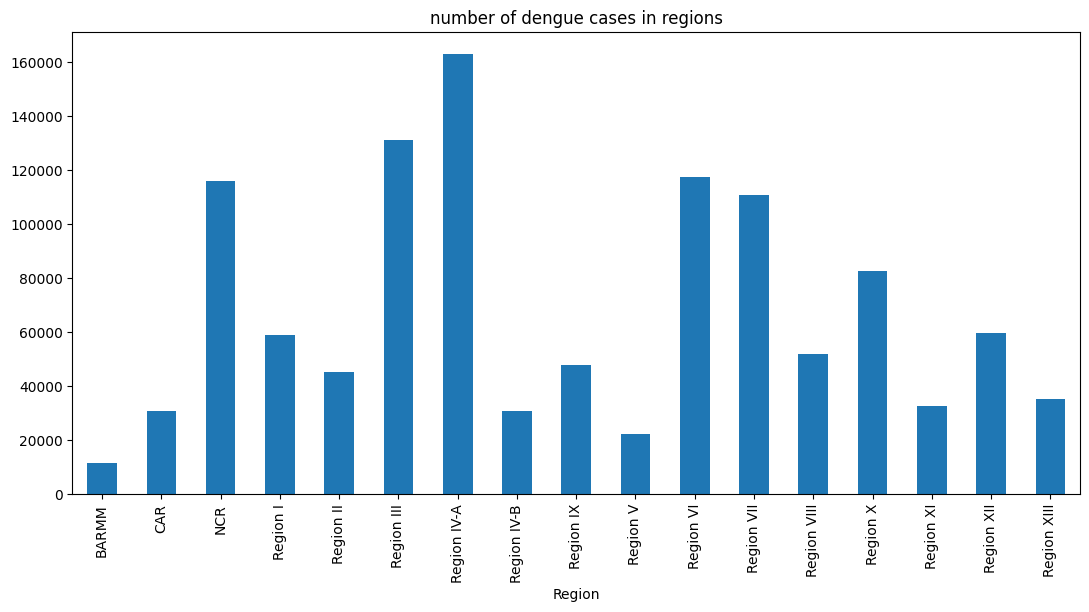

In [110]:
region = dengue.groupby(['Region'])['Dengue_Cases'].sum()
plt.figure(figsize=(13,6))

region.plot(kind='bar')
plt.title('number of dengue cases in regions')
plt.show()


<h2>Insight 4:<h2>
<h2>In Region IV-A (CALABARZON), dengue cases follow a clear seasonal pattern, with a significant spike occurring during the rainy season from June to November. The peak is observed in September, which accounts for approximately 21.5% of all cases in the region during the year.<h2>

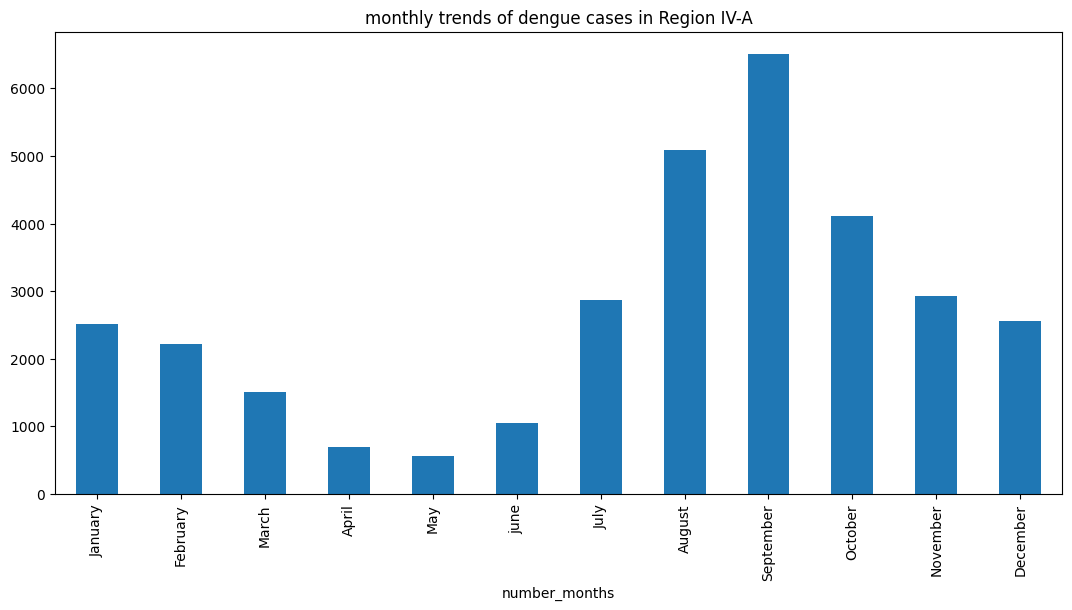

In [111]:
region_4a = dengue[dengue['Region'] == 'Region IV-A']

month_region_4  = region_4a.groupby(['number_months'])['Dengue_Cases'].mean()
month_region_4.index = month_region_4.index.map(month_names_reversed)
plt.figure(figsize=(13,6))
plt.title('monthly trends of dengue cases in Region IV-A')
month_region_4.plot(kind='bar')
plt.show()


<h2>Insight 5:<h2>
<h3>The data indicates a general trend of decreasing dengue-related deaths over the years, with a significant reduction observed between 2016 and 2020. While there was a slight increase in deaths in 2019, the overall trajectory shows a decline, with the number of deaths dropping by approximately 85.3% from 2016 to 2020.<h3>

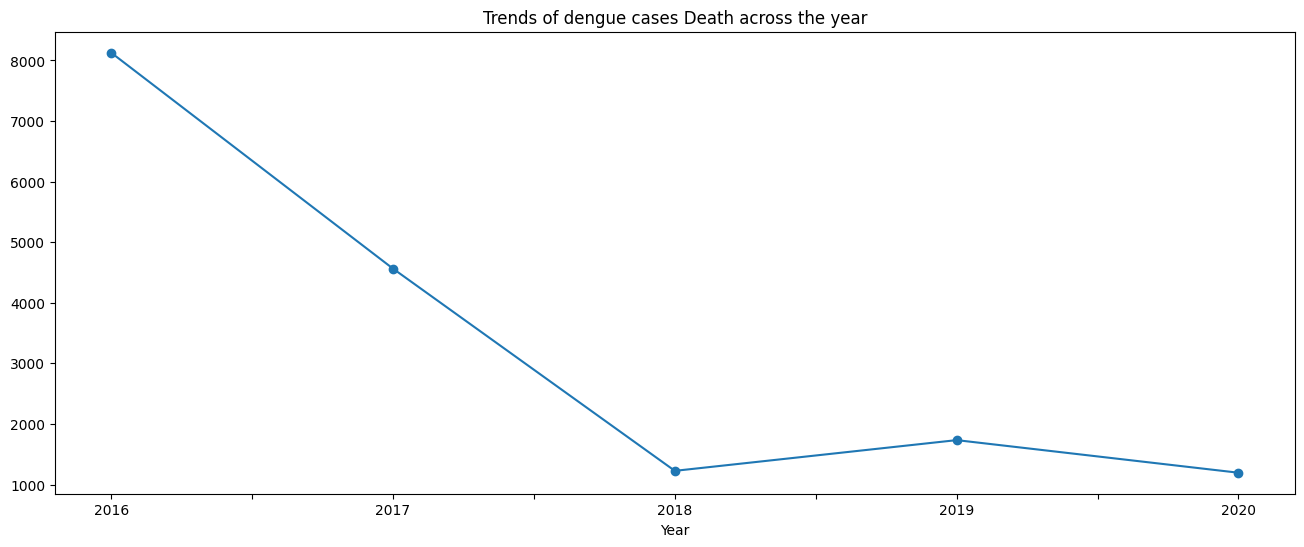

In [112]:
#year in which many deaths 
year_death = dengue.groupby(['Year'])['Dengue_Deaths'].sum()
plt.figure(figsize=(16,6))
plt.title('Trends of dengue cases Death across the year')
year_death.plot(kind='line',marker='o')
plt.show()


<h2>Insight 6:<h2>
<h2>Dengue deaths surge during the rainy season, with October recording 4,019% more deaths than May, highlighting the strong seasonal impact and the need for early preventive measures.<h2>

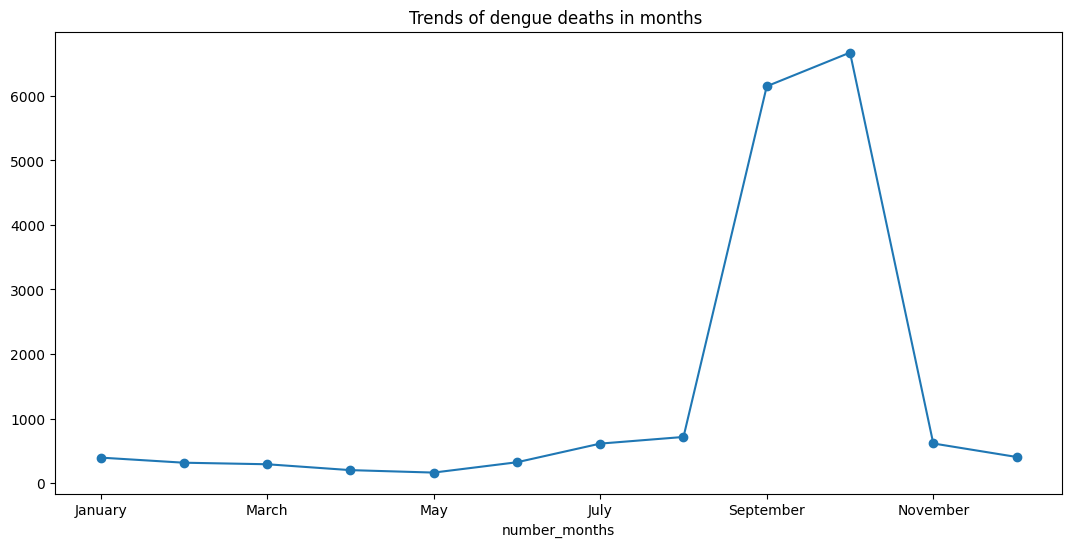

In [113]:
#Month with highest death
year_death = dengue.groupby(['number_months'])['Dengue_Deaths'].sum()
plt.figure(figsize=(13,6))
plt.title('Trends of dengue deaths in months ')
year_death.index = year_death.index.map(month_names_reversed)
year_death.plot(kind='line',marker='o')
plt.show()


<h2>Insight 7:<h2>
<h3>While Region IV-A (CALABARZON) reports the highest number of dengue cases nationwide, the National Capital Region (NCR) records the highest number of dengue-related deaths, accounting for approximately 22.3% of all dengue fatalities in the country.<h3>

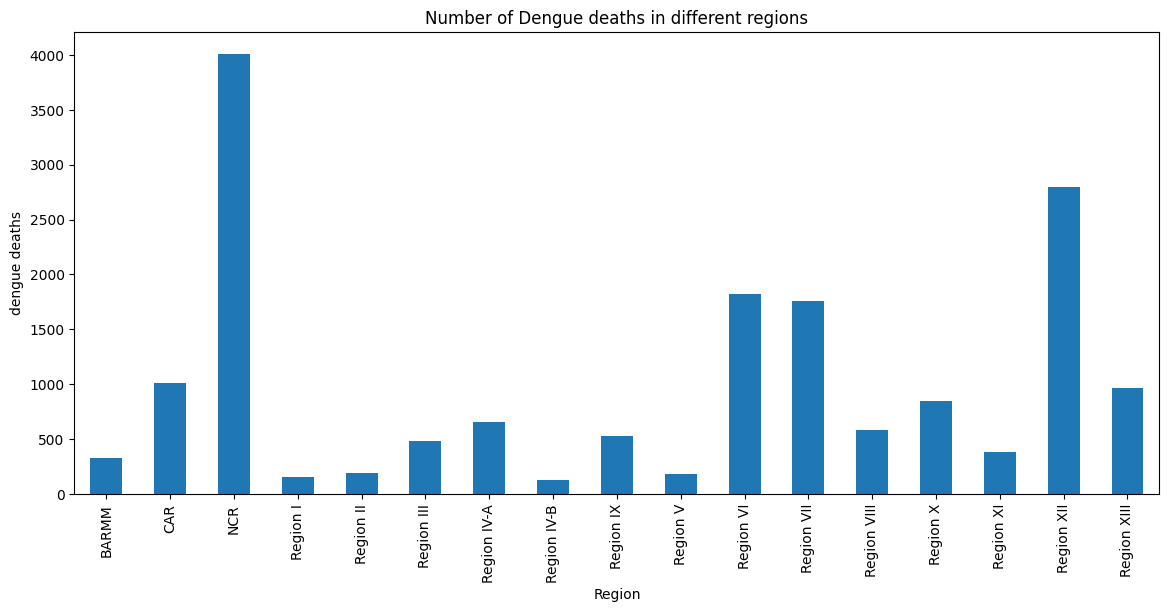

In [114]:
#Region with highest death
year_death = dengue.groupby(['Region'])['Dengue_Deaths'].sum()
plt.figure(figsize=(14,6))
plt.title('Number of Dengue deaths in different regions')
plt.xlabel('Regions')
plt.ylabel('dengue deaths')
year_death.plot(kind='bar')
plt.show()


<h2>Insight 8:<h2>
<h2>Dengue-related deaths in the NCR region saw a sharp decline from 2016 to 2017, followed by relatively stable numbers until 2019. However, there was a noticeable increase in 2020.<h2>

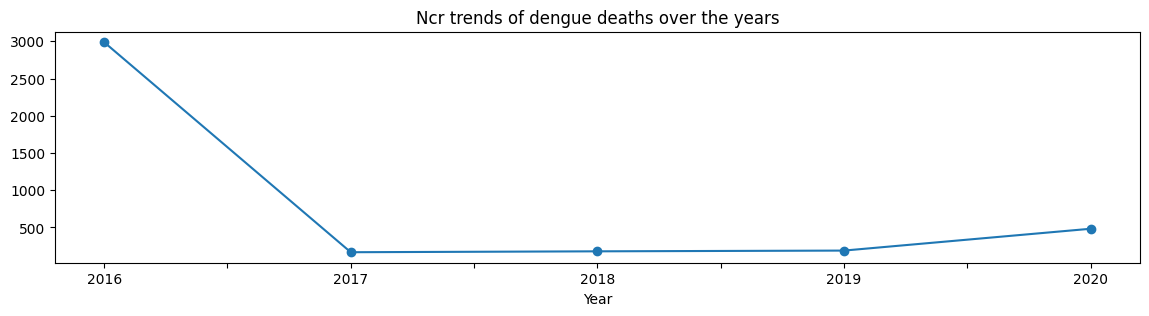

In [115]:
#in ncr trends of death over the years 
ncr_only = dengue[dengue['Region'] == 'NCR']

y_d_ncr = ncr_only.groupby(['Year'])['Dengue_Deaths'].sum()
plt.figure(figsize=(14,3))
y_d_ncr.plot(kind='line',marker='o')
plt.title('Ncr trends of dengue deaths over the years')
plt.show()



<h2>Insight 9:<h2>
<h2>Despite the decline in dengue-related deaths, the number of reported dengue cases increased significantly from 2016 to 2019, before experiencing a sharp drop in 2020.<h2>

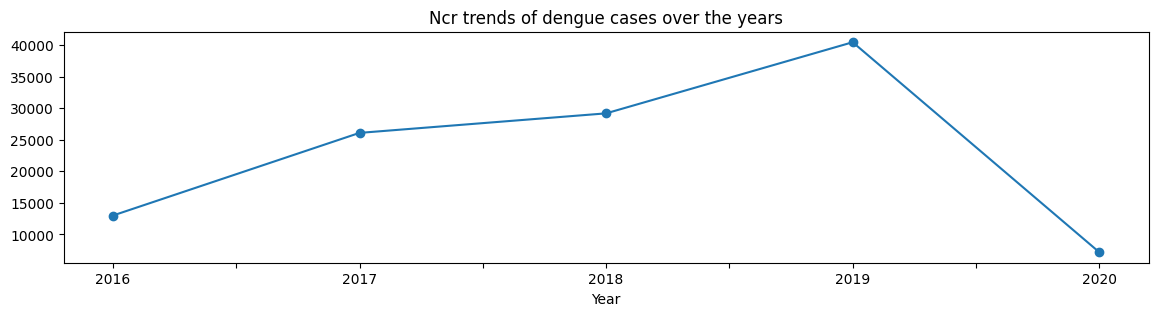

In [116]:
#dengue case in ncr in year
y_c_ncr = ncr_only.groupby(['Year'])['Dengue_Cases'].sum()
plt.figure(figsize=(14,3))
y_c_ncr.plot(kind='line',marker='o')
plt.title('Ncr trends of dengue cases over the years')
plt.show()


<h2>Insight 10:<h2>
<h2>There is no strong relationship between the number of dengue cases and deaths in NCR, meaning more cases do not always lead to more deaths in NCR region.<h2>

In [117]:
#correlation of dengue cases and dengue deaths in ncr 
cases_death_ncr = ncr_only['Dengue_Deaths'].corr(ncr_only['Dengue_Cases'])
cases_death_ncr

np.float64(-0.06060695854989641)

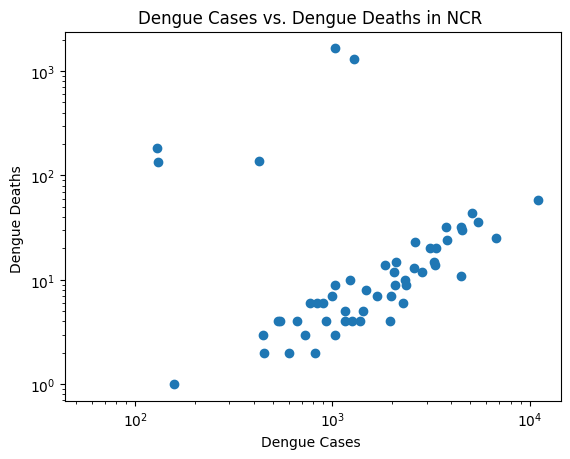

In [118]:
plt.scatter(ncr_only['Dengue_Cases'], ncr_only['Dengue_Deaths'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dengue Cases ')
plt.ylabel('Dengue Deaths ')
plt.title('Dengue Cases vs. Dengue Deaths in NCR ')
plt.show()

<h2>Insight 11:<h2>
<h3>The number of dengue deaths in the BARMM region dropped significantly from 243 in 2016 to just 2 in 2017. While deaths slightly increased in the following years, reaching 33 in 2018 and 31 in 2019, they declined again to 23 in 2020. This trend suggests an overall decrease in dengue fatalities, despite minor fluctuations.<h3>

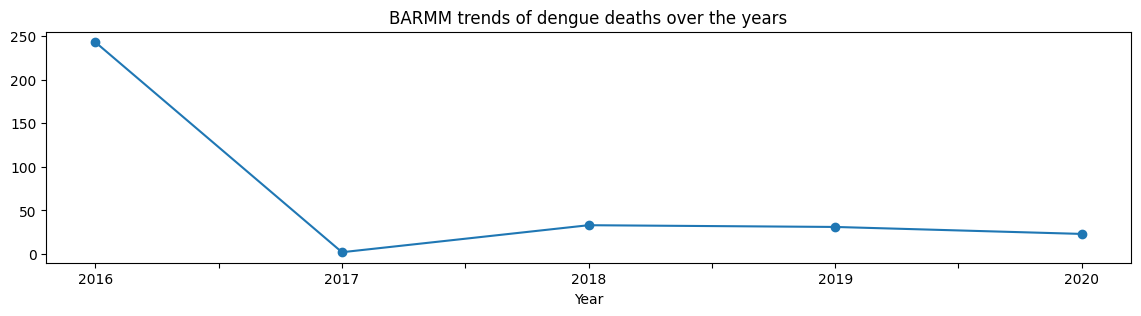

In [119]:
barmm_only = dengue[dengue['Region'] == 'BARMM']
barmm_year_death = barmm_only.groupby(['Year'])['Dengue_Deaths'].sum()
plt.figure(figsize=(14,3))
barmm_year_death.plot(kind='line',marker='o')
plt.title('BARMM trends of dengue deaths over the years')
plt.show()


<h2>Insight 12:<h2>
<h2>The year 2019 saw a dramatic surge in dengue cases, with 5,393 reported infections a 119% increase from 2018 highlighting the urgent need for stronger preventive measures and sustained public health efforts.<h2>

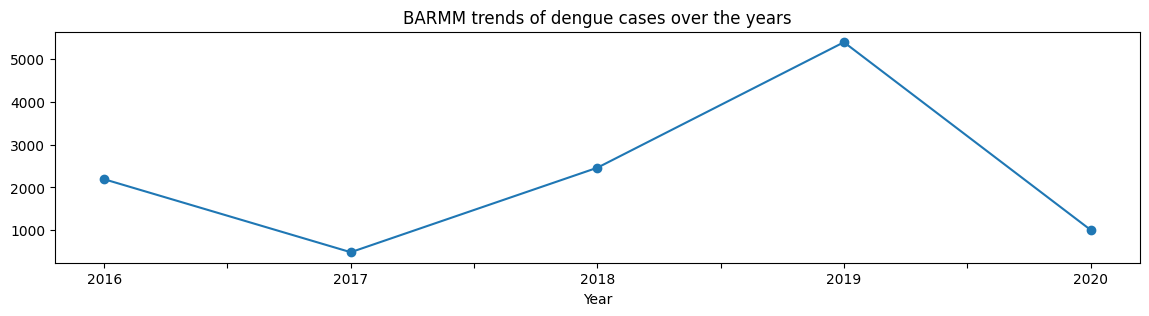

In [120]:
barmm_year_case = barmm_only.groupby(['Year'])['Dengue_Cases'].sum()
plt.figure(figsize=(14,3))
barmm_year_case.plot(kind='line',marker='o')
plt.title('BARMM trends of dengue cases over the years')
plt.show()


<h2>Insight 13:<h2>
<h2>There is a weak negative correlation (r = -0.056) between the number of dengue cases and deaths in the BARMM region, suggesting a slight decrease in deaths as cases increase, possibly due to improved healthcare or case management.<h2>

In [121]:
cases_death_barmm = barmm_only['Dengue_Cases'].corr(barmm_only['Dengue_Deaths'])
cases_death_barmm

np.float64(-0.05623243841121909)

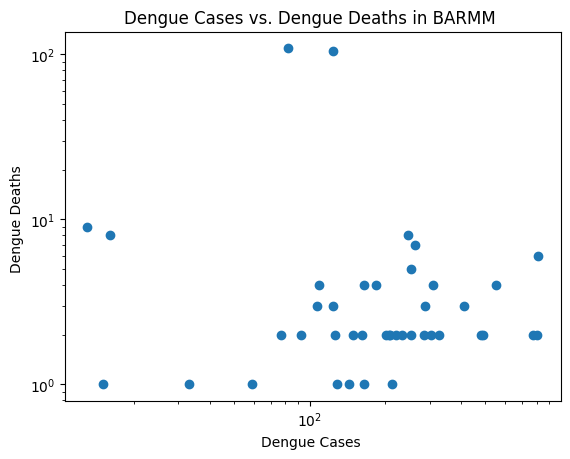

In [122]:
plt.scatter(barmm_only['Dengue_Cases'], barmm_only['Dengue_Deaths'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dengue Cases ')
plt.ylabel('Dengue Deaths ')
plt.title('Dengue Cases vs. Dengue Deaths in BARMM ')
plt.show()

<h2>Insight 14: <h2>
<h2>There is a very weak positive correlation (r = 0.038) between dengue cases and deaths across all regions, indicating that some areas may struggle with healthcare management or lack adequate resources to effectively manage severe cases.<h2>

In [123]:
# overall correlation

cases_death = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
cases_death


np.float64(0.03832213720419488)

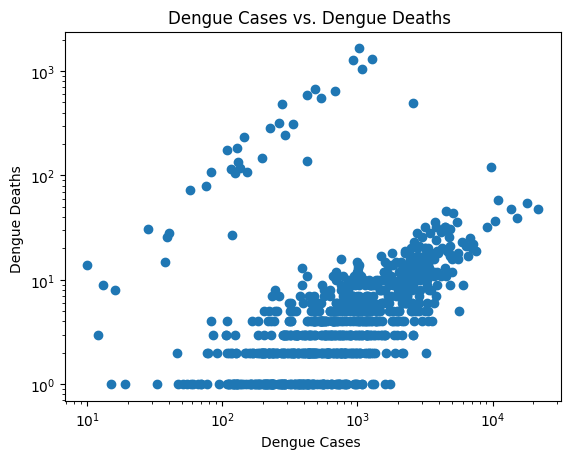

In [124]:
plt.scatter(dengue['Dengue_Cases'], dengue['Dengue_Deaths'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dengue Cases ')
plt.ylabel('Dengue Deaths ')
plt.title('Dengue Cases vs. Dengue Deaths ')
plt.show()

<h2>Insight 15:<h2>
<h2>In 2016, the NCR region reported a high dengue mortality rate of 23%, with deaths accounting for nearly a quarter of the total cases, which represented 77% of the region's reported incidents.<h2>

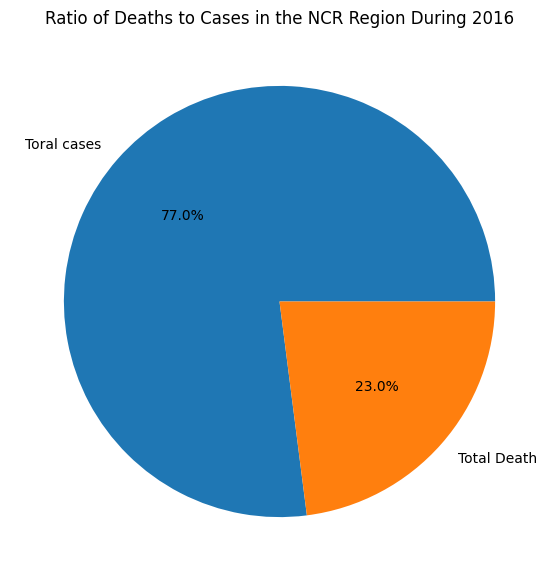

In [125]:
ncr = dengue[dengue['Region'] == 'NCR']
ncr = ncr[dengue['Year'] == 2016]
total_cases = ncr['Dengue_Cases'].sum()
total_death = ncr['Dengue_Deaths'].sum()
total_cases = total_cases - total_death 
plt.figure(figsize=(7,7))
plt.pie([total_cases,total_death], autopct='%1.1f%%',labels=['Toral cases','Total Death'])
plt.title('Ratio of Deaths to Cases in the NCR Region During 2016')
plt.show()

<h2>Insight 16<h2>
<h2>In 2020, the NCR region reported a lower dengue mortality rate of 6.7%, reflecting a notable improvement compared to previous years, with 93.3% of total cases being non-fatal.<h2>

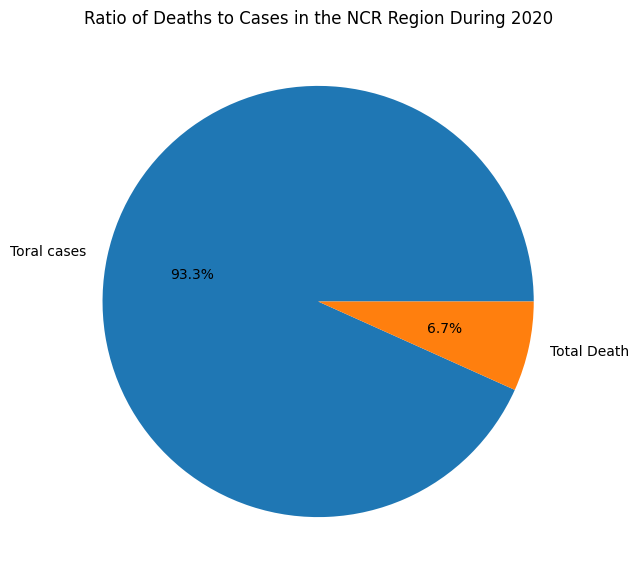

In [126]:
ncr = dengue[dengue['Region'] == 'NCR']
ncr = ncr[dengue['Year'] == 2020]
total_cases = ncr['Dengue_Cases'].sum()
total_death = ncr['Dengue_Deaths'].sum()
total_cases = total_cases - total_death 
plt.figure(figsize=(7,7))
plt.pie([total_cases,total_death], autopct='%1.1f%%',labels=['Toral cases','Total Death'])
plt.title('Ratio of Deaths to Cases in the NCR Region During 2020')
plt.show()

<h2>Insight 17:<h2>
<h2>In Region XII, 4.7% of total dengue cases led to deaths, while 95.3% of cases were non-fatal, suggesting a relatively low mortality rate and possibly effective case management<h2>

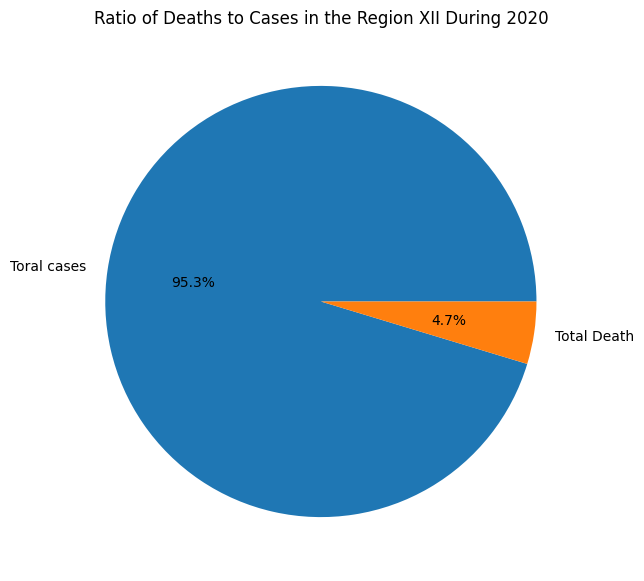

In [127]:
ncr = dengue[dengue['Region'] == 'Region XII']
total_cases = ncr['Dengue_Cases'].sum()
total_death = ncr['Dengue_Deaths'].sum()
total_cases = total_cases - total_death 
plt.figure(figsize=(7,7))
plt.pie([total_cases,total_death], autopct='%1.1f%%',labels=['Toral cases','Total Death'])
plt.title('Ratio of Deaths to Cases in the Region XII During 2020')
plt.show()

<h2>Insight 18<h2>
<h2>The NCR region accounts for the highest percentage of dengue deaths at 40.4%, while Region II has the lowest at only 0.8%. This highlights a significant disparity in dengue mortality across regions.<h2>

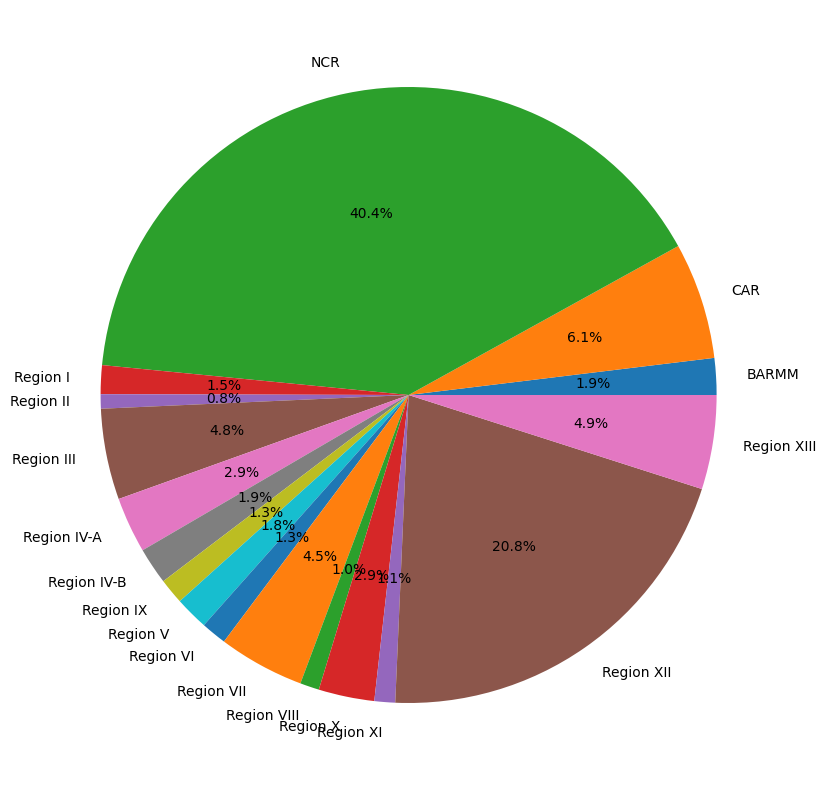

In [128]:
#year 2020 death distribution in each region
year_2020 = dengue[dengue['Year'] == 2020]

region_2020 = year_2020.groupby(['Region'])['Dengue_Deaths'].sum()
plt.figure(figsize=(20,10))
plt.pie(region_2020.values,labels=region_2020.index,autopct='%1.1f%%')
plt.show()

In [129]:
dengue_year_deaths = dengue.groupby(['Year','Region'])['Dengue_Deaths'].sum().reset_index()

<h2>Insight 19:<h2>
<h2>NCR has the highest dengue mortality rate (564.76), likely due to its dense population and urban congestion, while Region III has the lowest (19.71), possibly benefiting from lower population density and better mosquito control.<h2>

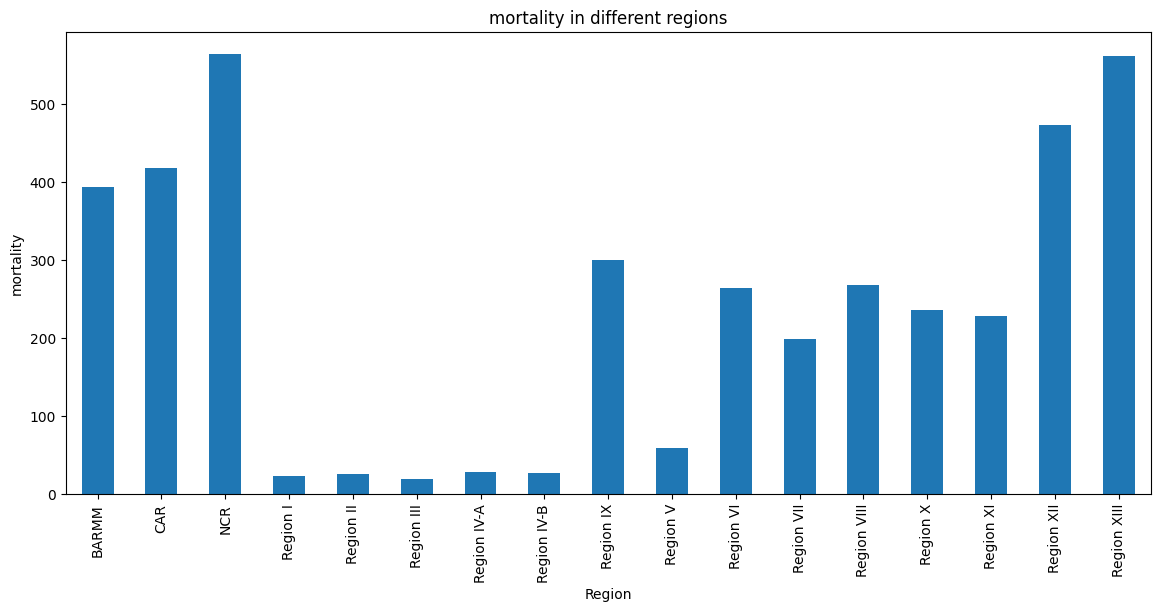

In [130]:
#Dengue Case mortality Rate (CFR) per Region

dengue['mortality'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases'] * 100
mortality_region = dengue.groupby(['Region'])['mortality'].sum()
plt.figure(figsize=(14,6))
plt.title('mortality in different regions')
plt.xlabel('Regions')
plt.ylabel('mortality')
mortality_region.plot(kind='bar')
plt.show()


<h2>Insight 20:<h2>
<h2>The highest mortality rate occurs in September and October, coinciding with the peak of the rainy season, which creates ideal breeding conditions for mosquitoes and increases the spread of dengue<h2>

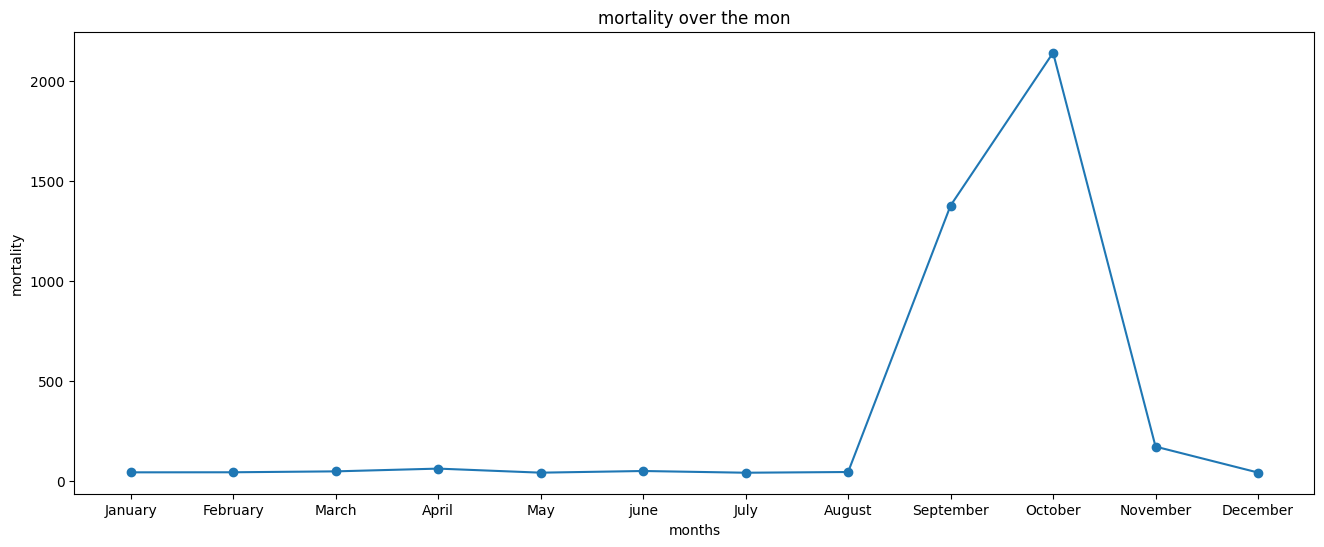

In [131]:
#month with the highest mortality

month_trends_mortality = dengue.groupby(['number_months'])['mortality'].sum().sort_index()

month_trends_mortality.index = month_trends_mortality.index.map(month_names_reversed)
plt.figure(figsize=(16,6))
plt.title('mortality over the mon')
plt.xlabel('months')
plt.ylabel('mortality')
plt.plot(month_trends_mortality.index,month_trends_mortality.values,marker='o')
plt.show()

<h2>Insight 21<h2>
<h2>2017 had the highest mortality rate in the Philippines, with a recorded value of 1,395.45. This could be attributed to factors such as severe outbreaks of diseases, natural disasters, or healthcare system challenges during that year.<h2>

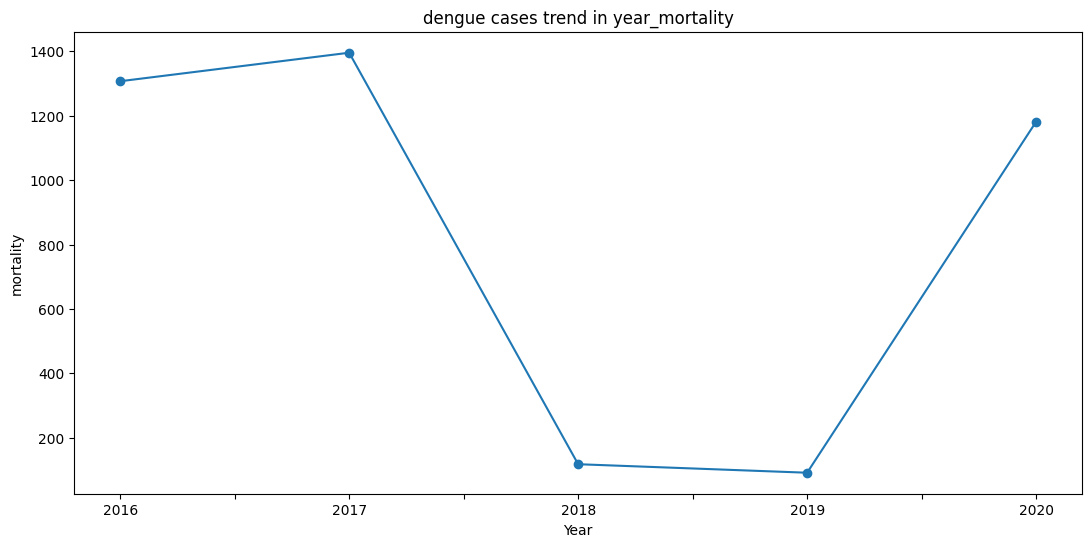

In [132]:
#mortality trend over the year
#year 
year_mortal = dengue.groupby(['Year'])['mortality'].sum()
plt.figure(figsize=(13,6))
plt.title('dengue cases trend in year_mortality')
year_mortal.plot(kind='line', marker ='o')
plt.ylabel('mortality')
plt.show()
